# **Arrhythmia classification with extracted features from ECG signal for arrhythmia detection**

**Connecting to Google Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Import Required Packages**

In [ ]:
import numpy as np
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import sklearn.cluster as cluster


import warnings
warnings.filterwarnings("ignore")
import os
import pickle

<h2>1. Business Problem</h2>

**Problem Description**

<p> Arrhythmia is an abnormality of the heart's rhythm. I may beat too slowly, too quickly or irregularity. These abnormalities range from a minor inconvenience or discomfort to a potentially fatal problem. Narrowed heart arteries, a heart attack, abnormal heart valves, prior heart surgery, heart failure, cardiomyopathy and other heart damage are risk factors for almost any kind of arrhythmia. High Blood Pressure: This condition increases the risk of developing coronary artery disease. </p>
<p> The arrhythmias can be classified into two major categories. The first category consists of arrhythmias formed by a single irregular heartbeat, are called morphological arrhythmia. The other category consists of arrhythmias formed by a set of irregular heartbeats, are  called rhythmic arrhythmias. </p>


*ECG: ElectroCardioGram*<br>
- It is a visual time series that records electrical activity generated by each cardiac cycle of the heart in real time.
- It is now widely used in heart-rate detection.
-The characteristics of ECG signals include random, low frequency and susceptible, resulting in the diagnosis results are unstable.

Credits: https://www.frontiersin.org/articles/10.3389/fncom.2020.564015/full

**Problem Definition**

- These Cardiovascular diseases are leading cause of death.
- The current identification method of diseases is analyzing the ElectroCardiogram [ECG], which is medical monitoring technology recording cardiac activity. 
- Unfortunately, looking for experts to analyze a large amount of ECG data consumes too many medical resources. 
- Therefore, a method based on Machine Learning or Deep Learning to accurately classify ECG characterstics.

**Sources**

- https://www.frontiersin.org/articles/10.3389/fncom.2020.564015/full
- https://www.kaggle.com/sadmansakib7/ecg-arrhythmia-classification-dataset
- https://www.sciencedirect.com/science/article/pii/S0169260715003314
- https://ecgwaves.com/topic/ekg-ecg-leads-electrodes-systems-limb-chest-precordial/

<h2>2. Dataset Information</h2>

Get the Data from: https://www.kaggle.com/sadmansakib7/ecg-arrhythmia-classification-dataset 

**DataFiles:** 
    
        - INCART 2-lead Arrhythmia Database.csv <br>
        - MIT-BIH Arrhythmia Database.csv <br>
        - MIT-BIH Supraventricular Arrhythmia Database.csv <br>
        - Sudden Cardiac Death Holter Database.csv <br>
        - Full_concat_data.pkl

The dataset contains features extracted two-lead ECG signal (lead II, V) from the MIT-BIH Arrhythmia dataset (Physionet)
- Each Lead views the heart from the angle of its positive electrode (Exploring electrode)
- Normally, There used to be 12 leads consist of two sets of ECG lead. <br>
  - **Limb Leads**: Limb Leads have exploring electrode and reference point placed in frontal plane. i.e.,(Superior and Inferior positions) <br>
        There are six Limb Leads:<br>
              - Lead I
              - Lead II
              - Lead III
              - Lead aVR
              - Lead aVL
              - Lead avF
![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjSXaYC2Kldyox1LxHduIxvSmu8g8My1F1wg&usqp=CAU)
  - **Chest Leads**: Also referred to be as Precordial Leads, where the exploring electrode and reference point are placed in Horizontal plane. i.e.,(Posterior and Anterior postions) <br>
        There are six Chest Leads:<br>
              - V1: Fourth InterCortal Space, to the right of sternum.
              - V2: Fourth InterCortal Space, to the left of sternum.
              - V3: Placed diagonally between V2 and v4.
              - V4: Between rib5 and rib6 and in midclavicular line.
              - V5: placed on the same level of V4, but in anterior axillary line.
              - V6: placed on the same level of V4 and V5, but in midaxillary line 


Credits: https://ecgwaves.com/topic/ekg-ecg-leads-electrodes-systems-limb-chest-precordial/

In [ ]:
data = pickle.load(open("/content/drive/MyDrive/Project AI ML/Data/Full_concat_data.pkl","rb"))

- After Concatenating Four datasets which have same columns,
The dataset has 963654 rows and 34 columns <br>
- Of these 34 columns,<br>
  - record: Indicates the name of patient
  - type: It represents Class Label.This data can be classified into five types.
          - N : Normal
          - S : Supraventricular ectopic beat
          - V : Ventricular ectopic beat
          - F : Fusion beat
          - Q : Unknown beat
        
<h3>In this Dataset, We extract the features of ECG signal of viewpoints of type:</h3>
   <h6>Lead II represented by 0 having 16 attributes</h6>
   <h6>Lead V5 represented by 1 having 16 attributes</h6>

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/SinusRhythmLabels.svg/280px-SinusRhythmLabels.svg.png)

- Normally, ECG signal consists of different waves to study the characterstics of Heart.<br>
  - **P Wave:** Depolarization of the atria.
  - **Q Wave:** Activation of antereseptal region of the ventricular myocardium.
  - **R Wave:** Depolarization of ventricular myocardium.
  - **S Wave:** Activation of Postereobasal portion of the ventricles.
  - **T Wave:** Rapid Ventricular repolarization.


# 16 attributes:
  - pre-RR: Determines RR interval with previous R Wave.
  - post-RR: Determines RR interval with next R Wave.
  - pPeak: Peak Amplitude of P wave.
  - qPeak: Peak Amplitude of Q wave.
  - rPeak: Peak Amplitude of R wave.
  - sPeak: Peak Amplitude of S wave.
  - tPeak: Peak Amplitude of T wave.
  - pq_interval: Time interval from starting of P wave to the starting of Q wave.
  - qt_interval: Time interval from starting of Q wave to the end of T wave.
  - st_interval: Time interval from end of S wave to the end of T wave.
  - qrs_interval: Time duration for completion of Q wave, R wave and S wave.

Morphological Features determine the series of deflections away from the baseline on the ECG. These can be calculated from QRS-T obtained from ECG delineation. Features are like AUC of QRS-T segment, maximal positive deviation of QRS, maximal negative deviation of QRS.
  - qrs_morph0
  - qrs_morph1
  - qrs_morph2
  - qrs_morph3
  - qrs_morph4

**Tools to process the Data:**
  - Pandas
  - Pickle

**Data Acquistion:**
  - Open Source Data [From Kaggle, I download the Dataset].
  - Yes, we can acquire data if we had monitored ECG signals of each heart beat. And from that signal, we need to calculate all features that we have taken.

In [ ]:
data.shape

(963654, 34)

Dataset size is of 9,63,654 rows and 34 columns

In [ ]:
data.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [ ]:
data.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76.0,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41.0,...,0.025930,2.0,18.0,22.0,2.0,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313.0,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21.0,...,-0.042009,26.0,27.0,62.0,9.0,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315.0,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22.0,...,0.009528,3.0,8.0,12.0,1.0,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321.0,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22.0,...,-0.020536,6.0,9.0,16.0,1.0,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336.0,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11.0,...,0.016053,16.0,5.0,31.0,10.0,0.016053,0.006742,0.002782,-0.007798,-0.051155


<h2>3. Key metric (KPI) to optimize </h2>

**Business Metric:**
- What is the metric to measure system/business?
- It should be easy to understand to non-expert persons too.
    - **Metric:** Number of Persons correctly classified per day.

**Performance Metrics:**
  - Precision and Recall are important. Hence we can use F1-Score.
  - Confusion Matrix
  - Log Loss
  
  - **Why?** If the classification of Arrhythmia by our model is more accurate. Then, most of the time, They can get correct prescription.

**Alternate Metrics:** 
  - Accuracy: If the data is imbalanced, Then It is Biased towards majority class.

**Pros of Performance Metrics:**
  - F1-Score: If the data is highly imbalanced, Then this metric achieves model's performance.
  - Confustion Matrix: It reflects how a classification model is disorganized and confused while making predictions.

**Cons of Performance Metrics:**
  - F1-Score: It is very hard to interpret.
  - Confusion Matrix: It won't work for Imbalanced data.


<h2>4. Real world Challenges and constraints</h2>

**Constraints:**:
  1. Highly Cost Sensitive to generate the data from the ECG.
  2. No Low Latency

**Requirements:**:
  1. To predict whether a person had arrhythmia or not more accurately.
  2. It should be interpretable.
 



<h2> 5. Literature Survey </h2>

**Type of Machine Learning Problem**
  - For a given Extracted features of heart beat at particular timestamp ECG Signal, We need to classify it one of the available five classes.
  - Hence, it is *Multi-class Classification problem*.
  - ECG signal can be continuous w.r.t time. Hence, Based on the previous signal data, we may predict the signal characterstics in future. Hence, this might also be referred to be as *Time series Forecasting*.

**Papers:**
1. **Electrocardiogram Features Extraction and
Classification for Arrhythmia Detection** <br>
     The
classification is performed using a quadratic discriminant function (QDF) and a multilayer perceptron (MLP).
2. **Arrhythmia detection and classification using morphological and dynamic features of ECG signals** <br>
 These features fed to Support Vector Machine (SVM) is utilized for the classification of heartbeats into 15 classes. 
3. **Ensemble Methods For ECG Based
Heart-beat Classification** <br>
Ensemble method is a meta-algorithm to build strong classifiers based
on a set of weak classifiers.Two popular ensemble classifiers XGBoost and RandomForest are used.
4. **A hierarchical method based on weighted extreme gradient boosting in ECG heartbeat classification** <br>
A hierarchical classifier is constructed in classification stage. The hierarchical classifier is composed of threshold and XGBoost classifiers. And the XGBoost classifiers are improved with weights.
**References:** <br>

1. Ouelli, Abdelhaq, et al. "Electrocardiogram features extraction and classification for arrhythmia detection." Database (SVDB) 2.3 (2015).
2. Ye, Can, Miguel Tavares Coimbra, and BVK Vijaya Kumar. "Arrhythmia detection and classification using morphological and dynamic features of ECG signals." 2010 Annual International Conference of the IEEE Engineering in Medicine and Biology. IEEE, 2010.
3. http//dx.doi.org/10.33832/ijca.2019.12.4.03
4. Shi, Haotian, et al. "A hierarchical method based on weighted extreme gradient boosting in ECG heartbeat classification." Computer methods and programs in biomedicine 171 (2019): 1-10.

# **Arrhythmia classification with extracted features from ECG signal for arrhythmia detection**

# Data Information

Get the Data from: https://www.kaggle.com/sadmansakib7/ecg-arrhythmia-classification-dataset 
The dataset contains features extracted two-lead ECG signal (lead II, V) from the MIT-BIH Arrhythmia dataset (Physionet)

**Reading the Data & Concatenating Four Datasets**

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Project AI ML/Data/MIT-BIH Arrhythmia Database.csv/MIT-BIH Arrhythmia Database.csv")

In [ ]:
data1.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [ ]:
data1.shape

(100689, 34)

In [ ]:
data1.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/Project AI ML/Data/MIT-BIH Supraventricular Arrhythmia Database.csv/MIT-BIH Supraventricular Arrhythmia Database.csv")

In [ ]:
data2.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [ ]:
data2.shape

(184428, 34)

In [ ]:
data2.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,800,N,168.0,167.0,-0.000659,-0.076691,1.079977,-0.958842,-0.009849,10,...,-0.072295,7,3,14,4,-0.072295,-0.055469,0.003311,0.077157,0.060548
1,800,N,167.0,169.0,-0.007237,-0.080968,1.117509,-0.993945,-0.037873,14,...,-0.011806,1,2,6,3,-0.011806,-0.011806,-0.011806,-0.011806,-0.011806
2,800,N,169.0,170.0,-0.015322,-0.065713,1.091163,-0.984797,-0.047307,15,...,-0.009710,0,2,4,2,-0.009710,-0.009710,-0.009710,-0.009710,-0.009710
3,800,N,170.0,166.0,-0.011573,-0.067132,1.075468,-0.912288,-0.018548,11,...,-0.060843,9,3,16,4,-0.060843,-0.055684,0.011955,0.039944,0.066575
4,800,N,166.0,169.0,-0.004269,-0.081436,1.163276,-0.991680,-0.013624,10,...,-0.029659,2,3,8,3,-0.029659,-0.029659,-0.029659,-0.005076,-0.005076


In [ ]:
data1.columns == data2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
data3 = pd.read_csv("/content/drive/MyDrive/Project AI ML/Data/INCART 2-lead Arrhythmia Database.csv/INCART 2-lead Arrhythmia Database.csv")

In [ ]:
data3.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [ ]:
data3.shape

(175729, 34)

In [ ]:
data3.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [ ]:
data3.columns == data2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
data4 = pd.read_csv("/content/drive/MyDrive/Project AI ML/Data/Sudden Cardiac Death Holter Database.csv/Sudden Cardiac Death Holter Database.csv")

In [ ]:
data4.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [ ]:
data4.shape

(502808, 34)

In [ ]:
data4.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,30.0,N,2.0,194.0,0.003261,0.159554,-0.046726,-0.046726,-0.129022,4.0,...,-0.131451,29.0,17.0,95.0,49.0,-0.131451,-0.015809,0.109493,-0.153622,-0.200331
1,30.0,N,194.0,188.0,-0.058462,0.067970,0.285091,-0.272093,-0.062109,25.0,...,-0.048727,25.0,2.0,76.0,49.0,-0.048727,0.034657,0.282264,-0.013981,-0.226871
2,30.0,N,188.0,194.0,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,29.0,...,-0.005256,29.0,5.0,53.0,19.0,-0.005256,0.007639,0.116198,0.271552,-0.114414
3,30.0,N,194.0,198.0,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,36.0,...,-0.069992,35.0,26.0,76.0,15.0,-0.069992,-0.049489,0.030777,0.378075,-0.074389
4,30.0,N,198.0,196.0,-0.047353,0.164835,0.364677,-0.207953,-0.061457,39.0,...,-0.072007,35.0,25.0,115.0,55.0,-0.072007,-0.053251,0.044583,0.313201,-0.157637


In [ ]:
data4.columns == data3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
full_data = pd.concat([data1,data2,data3,data4], axis = 0,ignore_index=True)

In [ ]:
full_data.shape

(963654, 34)

In [ ]:
if not os.path.isfile("/content/drive/MyDrive/Project AI ML/Data/Full_concat_data.pkl"):
  pickle.dump(full_data, open("/content/drive/MyDrive/Project AI ML/Data/Full_concat_data.pkl","wb"))
else:
  data = pickle.load(open("/content/drive/MyDrive/Project AI ML/Data/Full_concat_data.pkl","rb"))

# **Exploratory Data Analysis**

In [ ]:
data = pickle.load(open("/content/drive/MyDrive/Project AI ML/Data/Full_concat_data.pkl","rb"))

In [ ]:
data.shape

(963654, 34)

In [ ]:
data.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [ ]:
data.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76.0,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41.0,...,0.025930,2.0,18.0,22.0,2.0,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313.0,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21.0,...,-0.042009,26.0,27.0,62.0,9.0,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315.0,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22.0,...,0.009528,3.0,8.0,12.0,1.0,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321.0,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22.0,...,-0.020536,6.0,9.0,16.0,1.0,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336.0,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11.0,...,0.016053,16.0,5.0,31.0,10.0,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [ ]:
data['type'].unique()

array(['N', 'Q', 'SVEB', 'VEB', 'F', nan], dtype=object)

In [ ]:
data.shape

(963654, 34)

In [ ]:
data['type'].value_counts()

N       809352
VEB      51669
SVEB     18540
Q         6620
F         1256
Name: type, dtype: int64

In [ ]:
data.type.isnull().sum()

76217

- After concatenating the data, I checked the null values on the category type, Then, Some of the values are filled the either of five classes and around 76,000 rows which are not filled. Hence I broke down the dataset into test_set with all null values and train_set which have classes.

**Checking for Missing Values**

In [ ]:
data.isnull().sum()

record             76217
type               76217
0_pre-RR           76217
0_post-RR          76217
0_pPeak            76217
0_tPeak            76217
0_rPeak            76217
0_sPeak            76217
0_qPeak            76217
0_qrs_interval     76217
0_pq_interval      76217
0_qt_interval      76217
0_st_interval      76217
0_qrs_morph0       76217
0_qrs_morph1       76217
0_qrs_morph2       76217
0_qrs_morph3       76217
0_qrs_morph4       76217
1_pre-RR          174615
1_post-RR         174615
1_pPeak           174615
1_tPeak           174615
1_rPeak           174615
1_sPeak           174615
1_qPeak           174615
1_qrs_interval    174615
1_pq_interval     174615
1_qt_interval     174615
1_st_interval     174615
1_qrs_morph0      174615
1_qrs_morph1      174615
1_qrs_morph2      174615
1_qrs_morph3      174615
1_qrs_morph4      174615
dtype: int64

In [ ]:
data['0_pre-RR'] = data['0_pre-RR'].fillna(data['0_pre-RR'].mean())
data['0_post-RR'] = data['0_post-RR'].fillna(data['0_post-RR'].mean())
data['0_pPeak'] = data['0_pPeak'].fillna(data['0_pPeak'].mean())
data['0_tPeak'] = data['0_tPeak'].fillna(data['0_tPeak'].mean())
data['0_rPeak'] = data['0_rPeak'].fillna(data['0_rPeak'].mean())
data['0_sPeak'] = data['0_sPeak'].fillna(data['0_sPeak'].mean())
data['0_qPeak'] = data['0_qPeak'].fillna(data['0_qPeak'].mean())
data['0_qrs_interval'] = data['0_qrs_interval'].fillna(data['0_qrs_interval'].mean())
data['0_st_interval'] = data['0_st_interval'].fillna(data['0_st_interval'].mean())
data['0_qt_interval'] = data['0_qt_interval'].fillna(data['0_qt_interval'].mean())
data['0_pq_interval'] = data['0_pq_interval'].fillna(data['0_pq_interval'].mean())
data['0_qrs_morph0'] = data['0_qrs_morph0'].fillna(data['0_qrs_morph0'].mean())
data['0_qrs_morph1'] = data['0_qrs_morph1'].fillna(data['0_qrs_morph1'].mean())
data['0_qrs_morph2'] = data['0_qrs_morph2'].fillna(data['0_qrs_morph2'].mean())
data['0_qrs_morph3'] = data['0_qrs_morph3'].fillna(data['0_qrs_morph3'].mean())
data['0_qrs_morph4'] = data['0_qrs_morph4'].fillna(data['0_qrs_morph4'].mean())

In [ ]:
data['1_pre-RR'] = data['1_pre-RR'].fillna(data['1_pre-RR'].mean())
data['1_post-RR'] = data['1_post-RR'].fillna(data['1_post-RR'].mean())
data['1_pPeak'] = data['1_pPeak'].fillna(data['1_pPeak'].mean())
data['1_tPeak'] = data['1_tPeak'].fillna(data['1_tPeak'].mean())
data['1_rPeak'] = data['1_rPeak'].fillna(data['1_rPeak'].mean())
data['1_sPeak'] = data['1_sPeak'].fillna(data['1_sPeak'].mean())
data['1_qPeak'] = data['1_qPeak'].fillna(data['1_qPeak'].mean())
data['1_qrs_interval'] = data['1_qrs_interval'].fillna(data['1_qrs_interval'].mean())
data['1_st_interval'] = data['1_st_interval'].fillna(data['1_st_interval'].mean())
data['1_qt_interval'] = data['1_qt_interval'].fillna(data['1_qt_interval'].mean())
data['1_pq_interval'] = data['1_pq_interval'].fillna(data['1_pq_interval'].mean())
data['1_qrs_morph0'] = data['1_qrs_morph0'].fillna(data['1_qrs_morph0'].mean())
data['1_qrs_morph1'] = data['1_qrs_morph1'].fillna(data['1_qrs_morph1'].mean())
data['1_qrs_morph2'] = data['1_qrs_morph2'].fillna(data['1_qrs_morph2'].mean())
data['1_qrs_morph3'] = data['1_qrs_morph3'].fillna(data['1_qrs_morph3'].mean())
data['1_qrs_morph4'] = data['1_qrs_morph4'].fillna(data['1_qrs_morph4'].mean())

In [ ]:
data.isnull().sum()

record            76217
type              76217
0_pre-RR              0
0_post-RR             0
0_pPeak               0
0_tPeak               0
0_rPeak               0
0_sPeak               0
0_qPeak               0
0_qrs_interval        0
0_pq_interval         0
0_qt_interval         0
0_st_interval         0
0_qrs_morph0          0
0_qrs_morph1          0
0_qrs_morph2          0
0_qrs_morph3          0
0_qrs_morph4          0
1_pre-RR              0
1_post-RR             0
1_pPeak               0
1_tPeak               0
1_rPeak               0
1_sPeak               0
1_qPeak               0
1_qrs_interval        0
1_pq_interval         0
1_qt_interval         0
1_st_interval         0
1_qrs_morph0          0
1_qrs_morph1          0
1_qrs_morph2          0
1_qrs_morph3          0
1_qrs_morph4          0
dtype: int64

In [ ]:
pickle.dump(data,open('/content/drive/MyDrive/Project AI ML/Data/Full_concat_data_Mean_Imputation.pkl','wb'))

- Dataset is having missing values in all features. Hence for the further use, we should do imputation inorder to fill missing values.
- To process the imputation I have used average value of particular columns.

**Split the Dataset**

In [ ]:
test_data = data[data.type.isnull()]

In [ ]:
test_data.shape

(76217, 34)

In [ ]:
lst = []
s = ['N', 'Q', 'SVEB', 'VEB', 'F']
for idx,row in data.iterrows():
  if(row.type not in s):
    lst.append(idx)

In [ ]:
len(lst)

76217

In [ ]:
train_data = data.drop(index = lst,axis = 0)

In [ ]:
train_data.shape

(887437, 34)

In [ ]:
if not os.path.isfile("/content/drive/MyDrive/Project AI ML/Data/train_data.pkl"):
  pickle.dump(train_data, open("/content/drive/MyDrive/Project AI ML/Data/train_data.pkl","wb"))
else:
  train_data = pickle.load(open("/content/drive/MyDrive/Project AI ML/Data/train_data.pkl","rb"))

In [ ]:
if not os.path.isfile("/content/drive/MyDrive/Project AI ML/Data/test_data.pkl"):
  pickle.dump(test_data, open("/content/drive/MyDrive/Project AI ML/Data/test_data.pkl","wb"))
else:
  test_data = pickle.load(open("/content/drive/MyDrive/Project AI ML/Data/test_data.pkl","rb"))

In [ ]:
train_data['type'].value_counts()

N       809352
VEB      51669
SVEB     18540
Q         6620
F         1256
Name: type, dtype: int64

In [ ]:
test_data['type'].value_counts()

Series([], Name: type, dtype: int64)

In [ ]:
train_data['type'].unique()

array(['N', 'Q', 'SVEB', 'VEB', 'F'], dtype=object)

In [ ]:
test_data['type'].unique()

array([nan], dtype=object)

**Convert the problem into Binary Class Classification**

In [ ]:
def class_map(x):
  if(x == 'N'):
    return 0
  else:
    return 1

In [ ]:
train_data['class'] = train_data['type'].map(class_map)

In [ ]:
train_data['class'].value_counts()

0    809352
1     78085
Name: class, dtype: int64

In [ ]:
train_data.shape

(887437, 35)

In [ ]:
train_data.to_pickle("/content/drive/MyDrive/Project AI ML/Data/train_data.pkl")

- Then, In train_data I created the one more column of name 'class' inorder to convert problem into Binary Class Classification, which defines 0 as Normal class and 1 as rest of 4 classes.

**Plot the countplot**

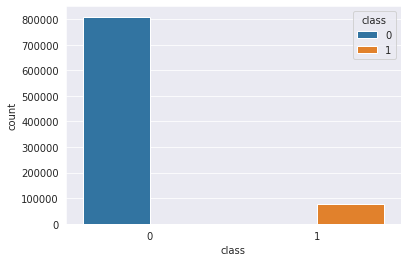

In [ ]:


sns.set_style('darkgrid')
sns.countplot(x = 'class',data = train_data,hue= 'class')
plt.show()

- From this plot, It is clear that dataset contains around 800,000 People with Normal Heart Beat and rest around 80,000 people have some abnormal Heart Beats.
- Hence It is clear that, Dataset is with Imbalanced classes.

**Visualize Feature Label Correlations**

In [ ]:
train_data.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,class
0,101,N,76.0,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41.0,...,2.0,18.0,22.0,2.0,0.025930,0.025930,0.025930,0.025436,0.025436,0
1,101,N,313.0,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21.0,...,26.0,27.0,62.0,9.0,-0.042009,-0.029498,0.005012,0.030892,0.002986,0
2,101,N,315.0,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22.0,...,3.0,8.0,12.0,1.0,0.009528,0.009528,0.008786,0.008786,0.008368,0
3,101,N,321.0,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22.0,...,6.0,9.0,16.0,1.0,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555,0
4,101,N,336.0,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11.0,...,16.0,5.0,31.0,10.0,0.016053,0.006742,0.002782,-0.007798,-0.051155,0


**Feature selection on feature label correlation using f-ratio**

 Ref: https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def select_features(X_train,y_train):
	# configure to select all features
 
  fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
  fs.fit(X_train, y_train)
	# transform train input data
  X_train_fs = fs.transform(X_train)
  # X_test_fs = fs.transform(X_test)
	# transform test input data
  return X_train_fs,fs
 

In [ ]:
X_train = train_data.iloc[:,2:]
y_train = train_data.iloc[:,-1]

X_test = test_data.iloc[:,2:]

In [ ]:
X_train,fs = select_features(X_train,y_train)



In [ ]:
fs.scores_.shape

(33,)

Feature 0: 0_pre-RR: 70283.203040
Feature 1: 0_post-RR: 26.409195
Feature 2: 0_pPeak: 60241.005069
Feature 3: 0_tPeak: 6790.150960
Feature 4: 0_rPeak: 2493.034367
Feature 5: 0_sPeak: 6299.906805
Feature 6: 0_qPeak: 13005.759061
Feature 7: 0_qrs_interval: 17051.025654
Feature 8: 0_pq_interval: 24912.060180
Feature 9: 0_qt_interval: 9536.186724
Feature 10: 0_st_interval: 31.355225
Feature 11: 0_qrs_morph0: 13005.759061
Feature 12: 0_qrs_morph1: 8519.295016
Feature 13: 0_qrs_morph2: 1526.700188
Feature 14: 0_qrs_morph3: 546.288684
Feature 15: 0_qrs_morph4: 3883.806344
Feature 16: 1_pre-RR: 61906.995749
Feature 17: 1_post-RR: 1122.066992
Feature 18: 1_pPeak: 481.954846
Feature 19: 1_tPeak: 13062.815454
Feature 20: 1_rPeak: 32.622062
Feature 21: 1_sPeak: 3467.284652
Feature 22: 1_qPeak: 24623.171575
Feature 23: 1_qrs_interval: 10891.086634
Feature 24: 1_pq_interval: 24159.840962
Feature 25: 1_qt_interval: 40099.609036
Feature 26: 1_st_interval: 17150.518322
Feature 27: 1_qrs_morph0: 24623.1

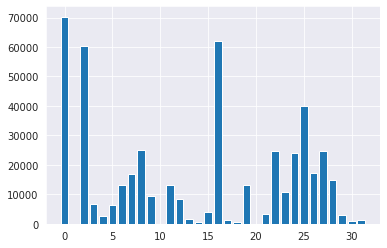

In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %d: %s: %f' % (i,train_data.columns[2:][i], fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

From the above bar plot features like 0_pre_RR,1_pre-RR,0_pPeak,1_qrs_morph0,0_pq_interval. These are the features that have higher correlation value with binary classifier label

**Correlation-Correlation Matrix**

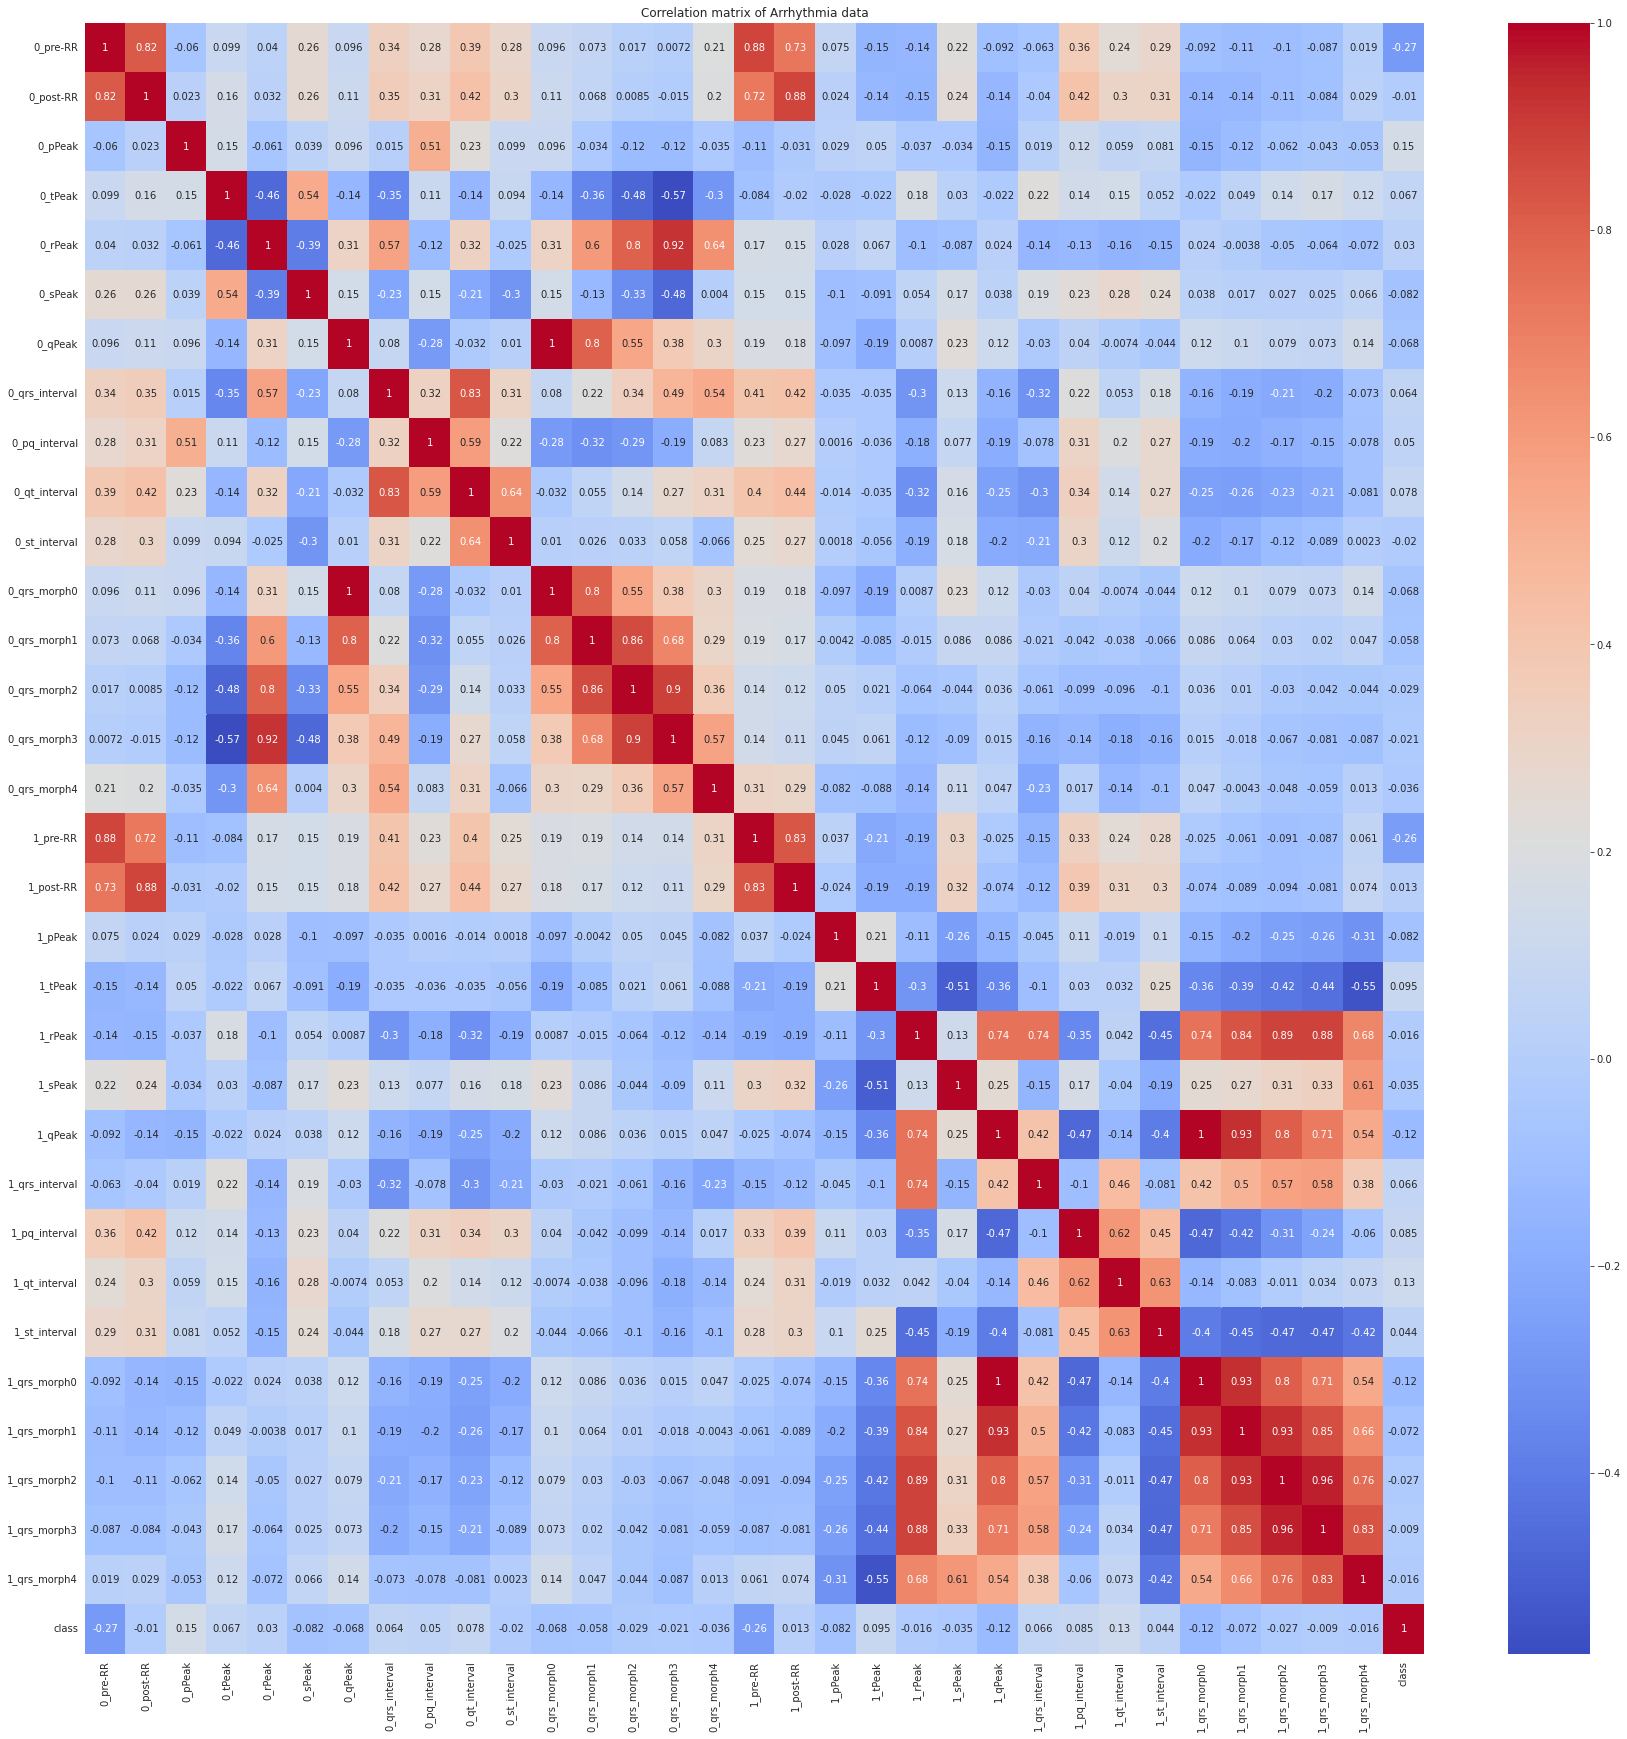

In [ ]:
plt.figure(figsize = (30,30))
sns.heatmap(train_data.corr(method = 'spearman'),annot = True,cmap='coolwarm')
plt.title("Correlation matrix of Arrhythmia data")
plt.show()


- From the above correlation matrix, the features ('0_qrs_morph0','0_qPeak') and ('1_qrs_morph0','1_qPeak') are highly correlated with value being 1.
that means, In a particular row, if one feature has high or low value then correspondingly the other feature has high or low value. Both features have same effect on class label. Hence It is better to have one feature from those pair of features.


In [ ]:
train_data = train_data.drop(columns = ['0_qrs_morph0','1_qrs_morph0'],axis = 0)

In [ ]:
train_data.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph1', '0_qrs_morph2',
       '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR', '1_pPeak',
       '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph1',
       '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4', 'class'],
      dtype='object')

In [ ]:
train_data.to_pickle("/content/drive/MyDrive/Project AI ML/Data/train_data_after_correlation.pkl")

In [ ]:
train_data = pd.read_pickle("/content/drive/MyDrive/Project AI ML/Data/train_data_after_correlation.pkl")

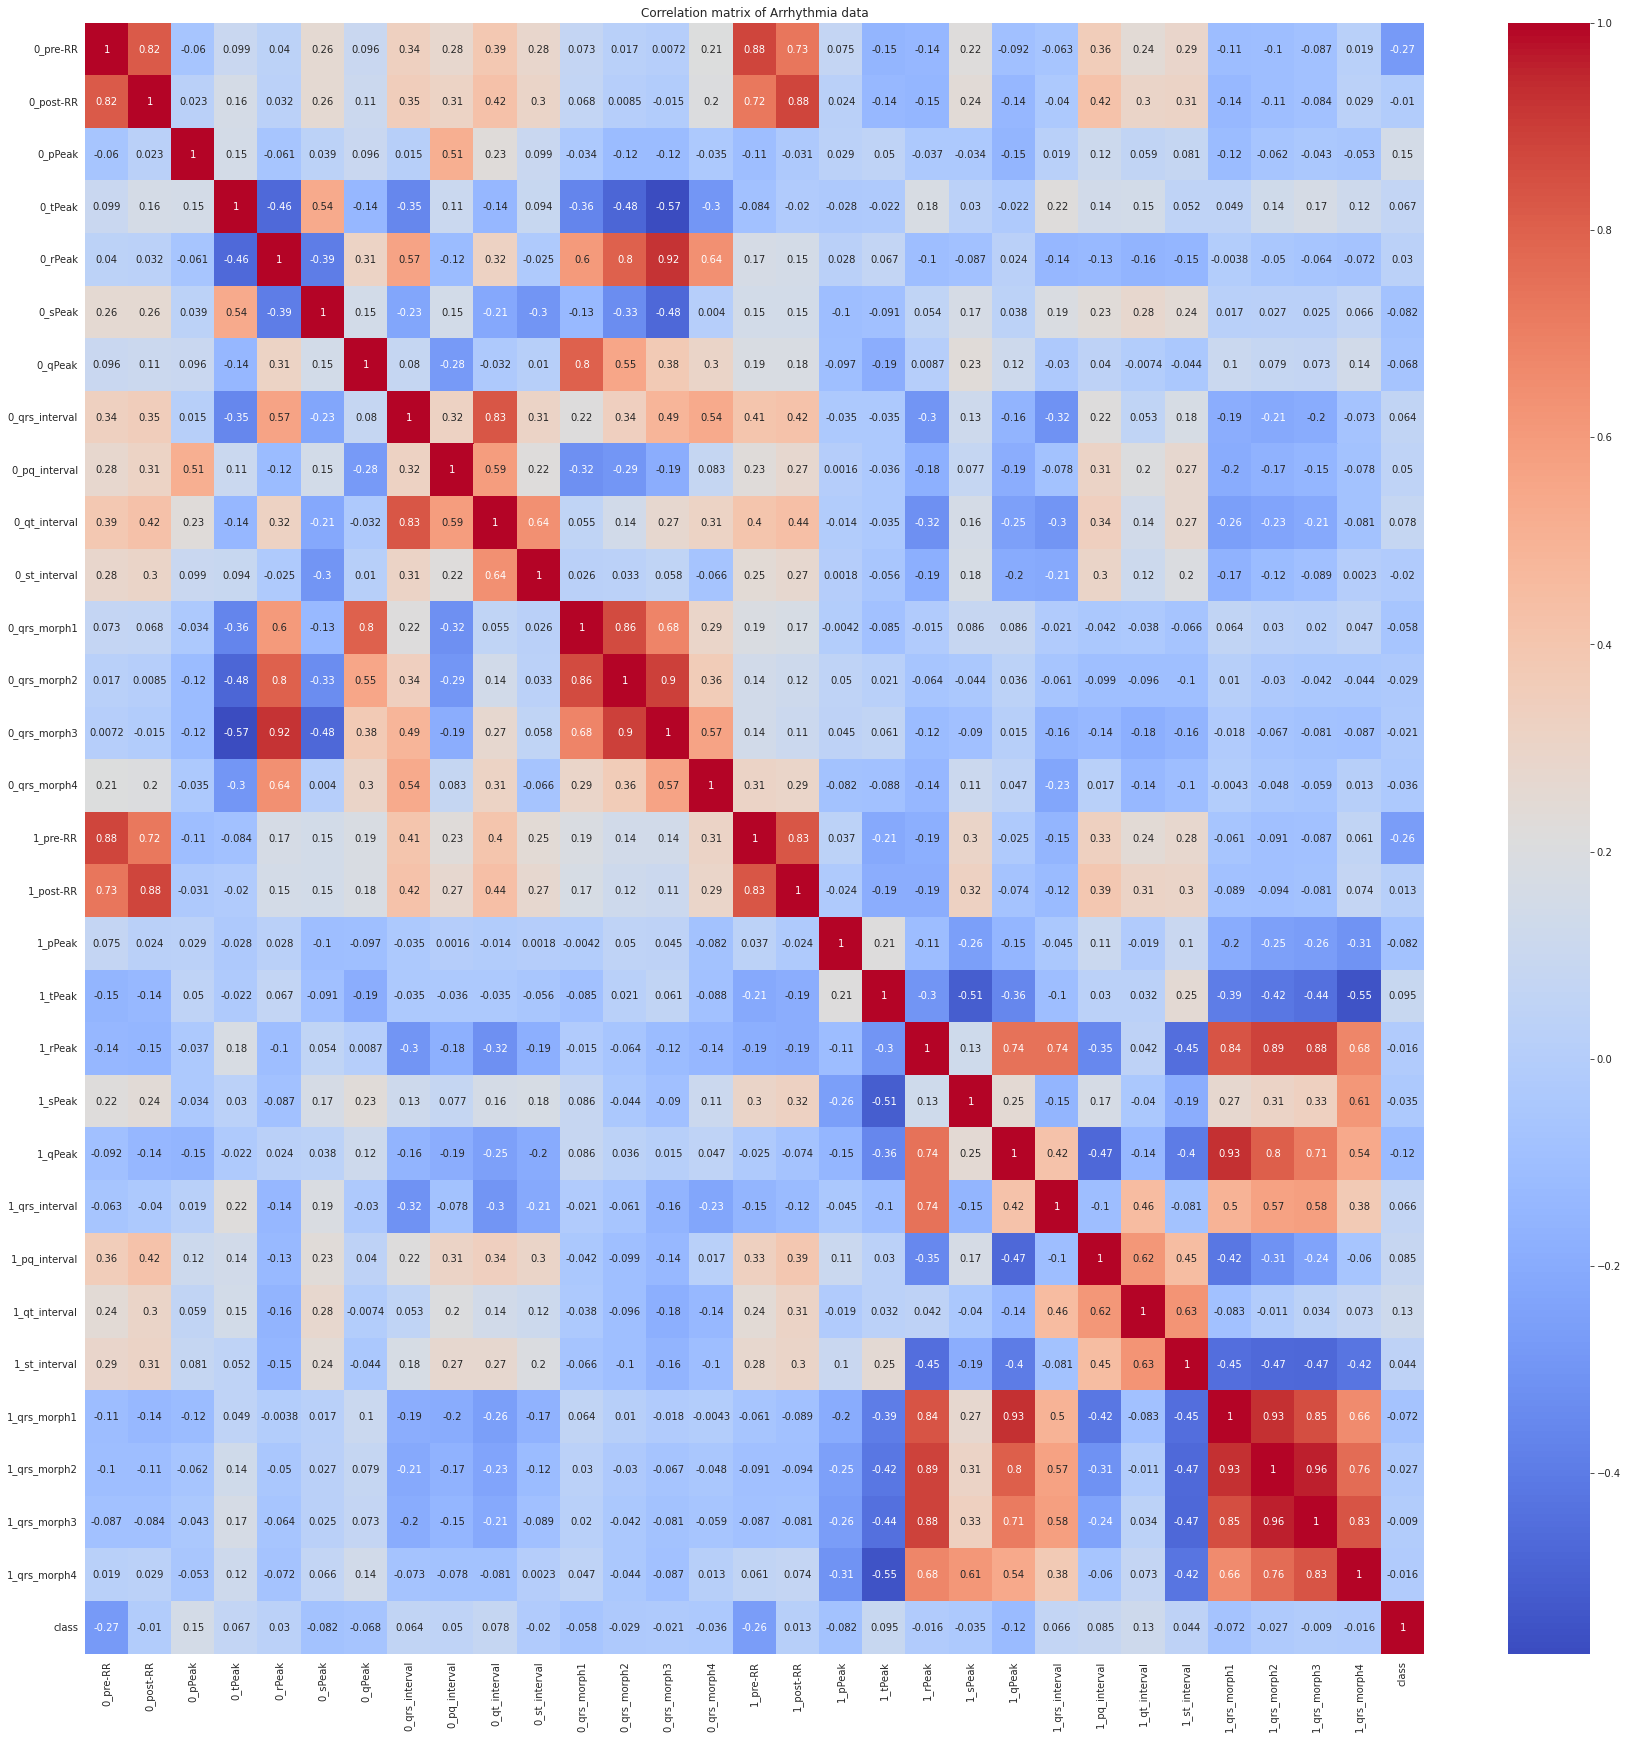

In [ ]:
plt.figure(figsize = (30,30))
sns.heatmap(train_data.corr(method = 'spearman'),annot = True,cmap='coolwarm')
plt.title("Correlation matrix of Arrhythmia data")
plt.show()


In [ ]:
X_train = train_data.iloc[:,2:]
y_train = train_data.iloc[:,-1]
X_train,fs = select_features(X_train,y_train)

Feature 0: 0_pre-RR: 70283.203040
Feature 1: 0_post-RR: 26.409195
Feature 2: 0_pPeak: 60241.005069
Feature 3: 0_tPeak: 6790.150960
Feature 4: 0_rPeak: 2493.034367
Feature 5: 0_sPeak: 6299.906805
Feature 6: 0_qPeak: 13005.759061
Feature 7: 0_qrs_interval: 17051.025654
Feature 8: 0_pq_interval: 24912.060180
Feature 9: 0_qt_interval: 9536.186724
Feature 10: 0_st_interval: 31.355225
Feature 11: 0_qrs_morph1: 8519.295016
Feature 12: 0_qrs_morph2: 1526.700188
Feature 13: 0_qrs_morph3: 546.288684
Feature 14: 0_qrs_morph4: 3883.806344
Feature 15: 1_pre-RR: 61906.995749
Feature 16: 1_post-RR: 1122.066992
Feature 17: 1_pPeak: 481.954846
Feature 18: 1_tPeak: 13062.815454
Feature 19: 1_rPeak: 32.622062
Feature 20: 1_sPeak: 3467.284652
Feature 21: 1_qPeak: 24623.171575
Feature 22: 1_qrs_interval: 10891.086634
Feature 23: 1_pq_interval: 24159.840962
Feature 24: 1_qt_interval: 40099.609036
Feature 25: 1_st_interval: 17150.518322
Feature 26: 1_qrs_morph1: 14796.703725
Feature 27: 1_qrs_morph2: 2845.18

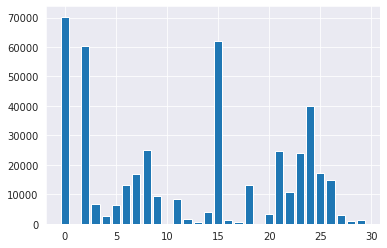

In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %d: %s: %f' % (i,train_data.columns[2:][i], fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

From the above bar plot features like **0_pre_RR,1_pre-RR,0_pPeak,1_qt_interval,0_pq_interval**. These are the features that have higher correlation value with binary classifier label

**Distribution of Top 5 features correlated to class label**

- From the above graph, we can consider the top 5 features that highly correlated with class label, we can study the distribution of those features. Those features are ‘0_pre-RR’, ‘1_pre-RR’, ‘0_pPeak’, ‘1_qt_interval’, ‘1_qrs_morph0’. 

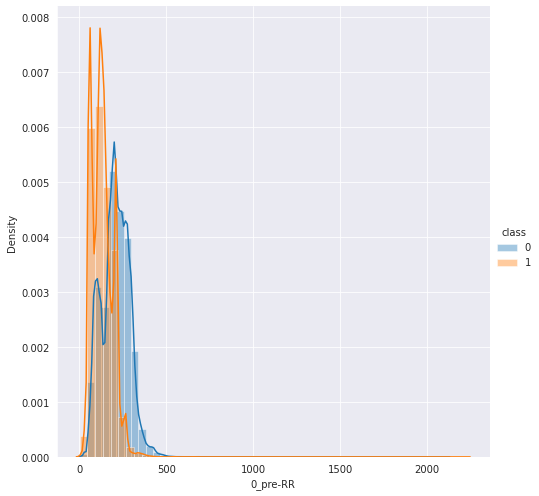

In [ ]:
sns.FacetGrid(train_data,hue='class',size = 7).map(sns.distplot,'0_pre-RR').add_legend()
plt.show()

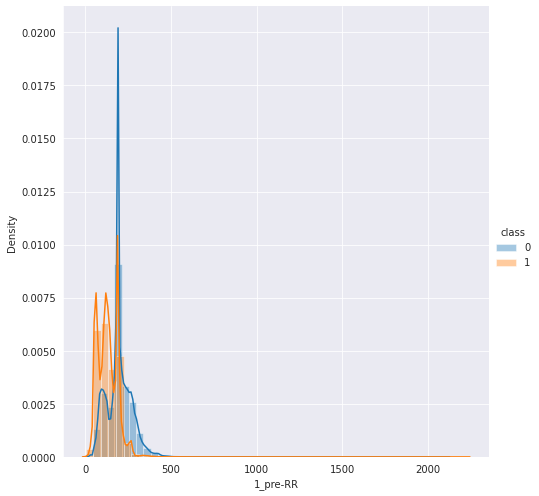

In [ ]:
sns.FacetGrid(train_data,hue='class',size = 7).map(sns.distplot,'1_pre-RR').add_legend()
plt.show()

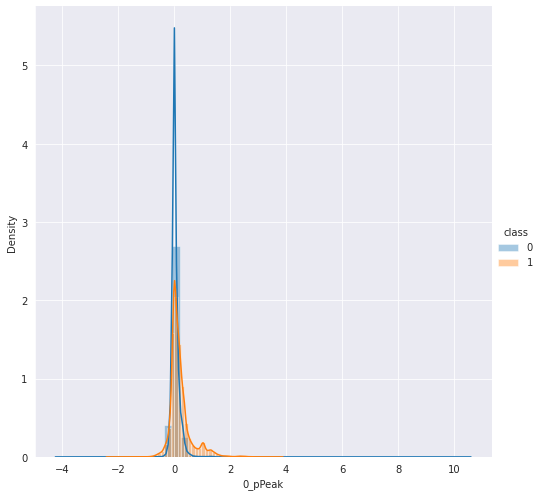

In [ ]:
sns.FacetGrid(train_data,hue='class',size = 7).map(sns.distplot,'0_pPeak').add_legend()
plt.show()

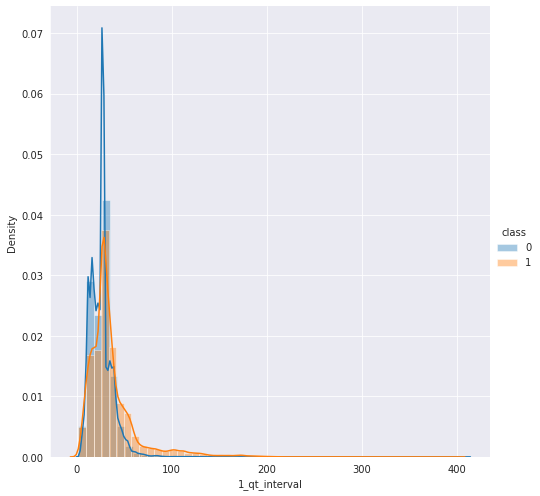

In [ ]:
sns.FacetGrid(train_data,hue='class',size = 7).map(sns.distplot,'1_qt_interval').add_legend()
plt.show()

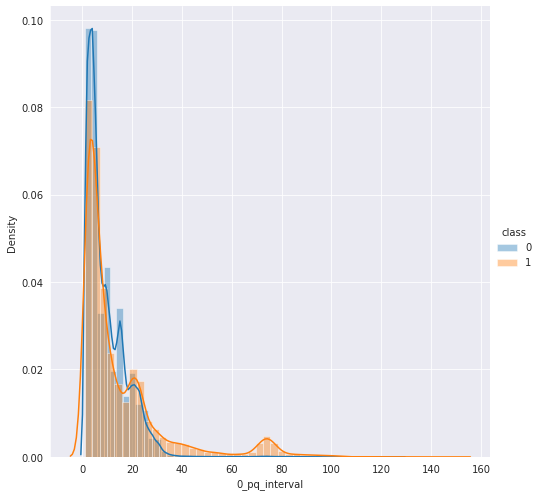

In [ ]:
sns.FacetGrid(train_data,hue='class',size = 7).map(sns.distplot,'0_pq_interval').add_legend()
plt.show()

- From these distributions, It is clear that No feature can work better for classification, if they are individually worked. We can't even create simple model of "if else" to classify them.

**Principal Component Analysis**

**Ref:** https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
X = train_data.drop(columns = ['record','class','type'],axis = 0)
y = train_data['class']

In [ ]:
X.head()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,76.0,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41.0,18.0,66.0,...,0.025271,0.025930,2.0,18.0,22.0,2.0,0.025930,0.025930,0.025436,0.025436
1,313.0,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21.0,4.0,33.0,...,-0.104503,-0.042009,26.0,27.0,62.0,9.0,-0.029498,0.005012,0.030892,0.002986
2,315.0,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22.0,3.0,32.0,...,0.008230,0.009528,3.0,8.0,12.0,1.0,0.009528,0.008786,0.008786,0.008368
3,321.0,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22.0,4.0,33.0,...,-0.010203,-0.020536,6.0,9.0,16.0,1.0,-0.020257,-0.018965,-0.016968,-0.014555
4,336.0,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11.0,4.0,16.0,...,-0.099918,0.016053,16.0,5.0,31.0,10.0,0.006742,0.002782,-0.007798,-0.051155


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(X)

In [ ]:
pca_data.shape

(887437, 30)

In [ ]:
type(y.values)

numpy.ndarray

In [ ]:
pca_da = np.vstack((pca_data.T,y.values)).T

In [ ]:
pca_da.shape

(887437, 6)

In [ ]:
pca_dataset = pd.DataFrame(pca_da,columns =train_data.columns[2:])

In [ ]:
pca_dataset.head()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,class
0,1.310596,237.058477,9.968398,8.044032,11.698812,27.862904,14.679689,6.820281,1.866610,12.935786,...,-0.028890,-0.007098,0.107696,0.011176,0.004679,-0.025701,0.020201,6.691990e-12,2.678592e-13,0.0
1,233.168311,-3.125882,35.034720,36.231228,-30.927817,-9.255265,-1.286830,6.674944,-1.866324,14.659200,...,-0.016579,-0.136911,0.129680,-0.077110,-0.006264,-0.000270,-0.004271,1.213513e-13,-1.924114e-12,0.0
2,239.453870,-2.602884,35.796093,34.941446,24.938060,8.170421,1.992932,6.011455,-1.689066,6.950212,...,0.065020,-0.094693,0.051034,-0.009757,0.023505,-0.010641,0.009163,-1.842041e-12,1.075639e-12,0.0
3,260.553231,6.152790,38.448451,36.750925,21.266281,7.307024,2.291539,5.448087,-3.407799,7.413187,...,0.045610,-0.098795,0.054215,-0.031226,0.023470,-0.003159,0.007180,1.095831e-12,-4.316301e-14,0.0
4,281.192794,-3.129555,59.120077,45.159097,6.217642,-2.384261,0.959274,1.067724,-5.433947,-2.114894,...,0.014035,-0.057401,0.003366,0.020032,0.004731,0.003554,-0.003801,1.086799e-12,-1.180418e-12,0.0


In [ ]:
X_train = pca_dataset.iloc[:]
y_train = pca_dataset.iloc[:,-1]
X_train,fs = select_features(X_train,y_train)

Feature 0: 0_pre-RR: 13978.555131
Feature 1: 0_post-RR: 240614.140820
Feature 2: 0_pPeak: 5765.986682
Feature 3: 0_tPeak: 92.792489
Feature 4: 0_rPeak: 39880.826639
Feature 5: 0_sPeak: 9753.886440
Feature 6: 0_qPeak: 2854.651676
Feature 7: 0_qrs_interval: 31.982765
Feature 8: 0_pq_interval: 542.044258
Feature 9: 0_qt_interval: 71.261760
Feature 10: 0_st_interval: 154.883124
Feature 11: 0_qrs_morph1: 881.614630
Feature 12: 0_qrs_morph2: 4912.004220
Feature 13: 0_qrs_morph3: 9341.329958
Feature 14: 0_qrs_morph4: 933.523801
Feature 15: 1_pre-RR: 8977.440180
Feature 16: 1_post-RR: 2.443726
Feature 17: 1_pPeak: 163.696693
Feature 18: 1_tPeak: 845.200161
Feature 19: 1_rPeak: 9204.676700
Feature 20: 1_sPeak: 3927.285523
Feature 21: 1_qPeak: 928.728603
Feature 22: 1_qrs_interval: 267.592726
Feature 23: 1_pq_interval: 1953.910846
Feature 24: 1_qt_interval: 1145.346260
Feature 25: 1_st_interval: 620.967534
Feature 26: 1_qrs_morph1: 947.620102
Feature 27: 1_qrs_morph2: 22.987992
Feature 28: 1_qrs

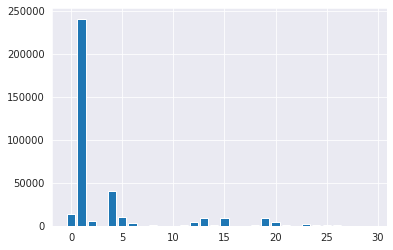

In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %d: %s: %f' % (i,pca_dataset.columns[i], fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

- After performing PCA on dataset, we found top 5 features: ‘0_post-RR’, ‘0_rPeak’, ‘0_pre-RR’, ‘0_sPeak’, ‘1_pre-RR’.

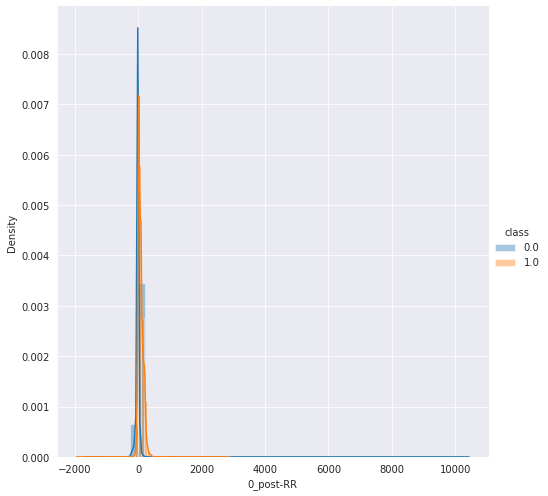

In [ ]:
sns.FacetGrid(pca_dataset,hue='class',size = 7).map(sns.distplot,'0_post-RR').add_legend()
plt.show()

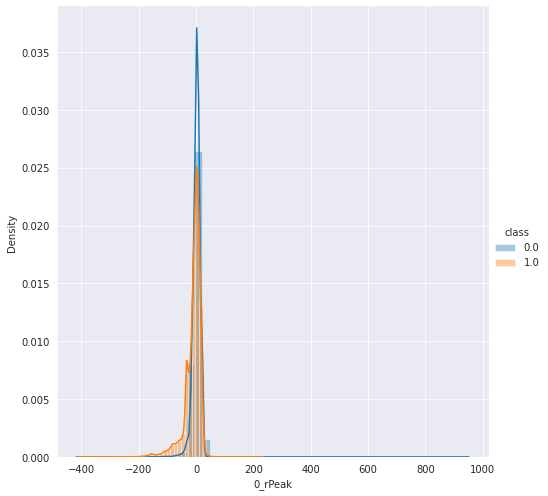

In [ ]:
sns.FacetGrid(pca_dataset,hue='class',size = 7).map(sns.distplot,'0_rPeak').add_legend()
plt.show()

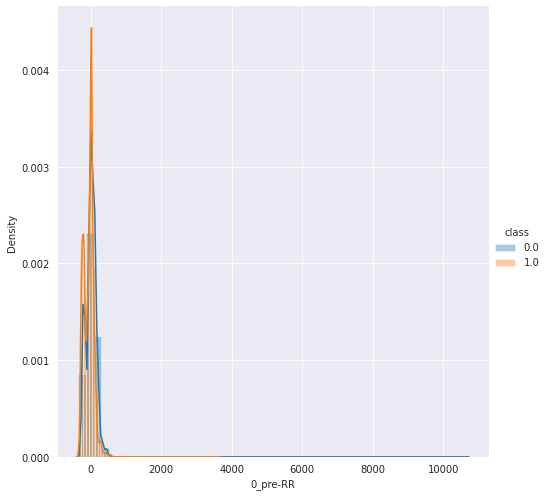

In [ ]:
sns.FacetGrid(pca_dataset,hue='class',size = 7).map(sns.distplot,'0_pre-RR').add_legend()
plt.show()

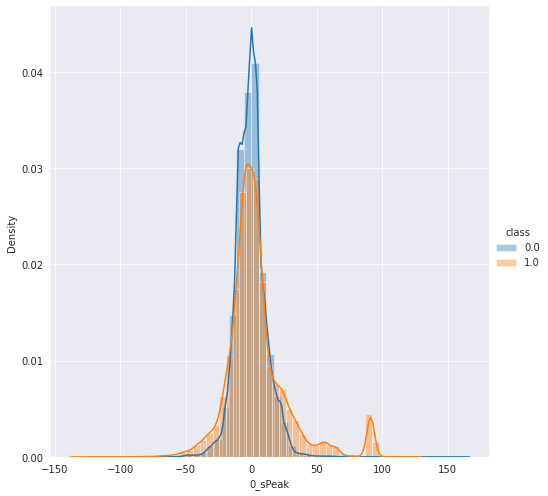

In [ ]:
sns.FacetGrid(pca_dataset,hue='class',size = 7).map(sns.distplot,'0_sPeak').add_legend()
plt.show()

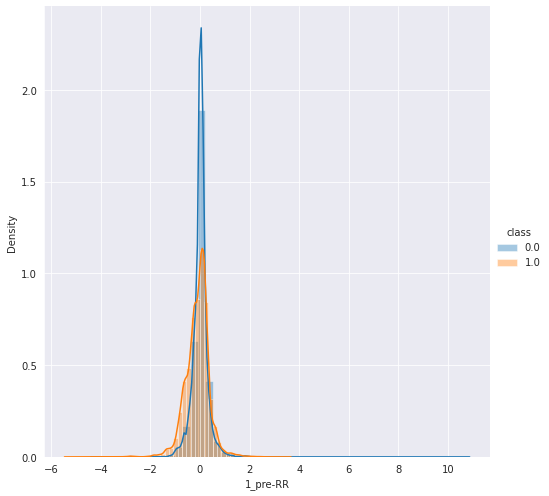

In [ ]:
sns.FacetGrid(pca_dataset,hue='class',size = 7).map(sns.distplot,'1_pre-RR').add_legend()
plt.show()

- After performing PCA on the top features that are correlated to class label, there is still two classes merges. 

      By using other features, we can't even build the model since both class can't be classified.

In [ ]:
pca_dataset.to_pickle("/content/drive/MyDrive/Project AI ML/Data/PCA_data.pkl")
train_data.to_pickle("/content/drive/MyDrive/Project AI ML/Data/TRAIN_data_after_removing_corr_feat.pkl")

**K means Clustering**

- **K-Means Algorithm:** It is a clustering algorithm. It is Unsupervised algorithm. In this technique, task is to group/cluster "Similar" data points. Points in clusters are close together and points in a different clusters are farther away.


**Ref1:** https://www.kaggle.com/code/rodrigofragoso/explained-k-means-pca-visualization <br>
**Ref2:**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**Normalization**

In [ ]:
X = train_data.drop(columns = ['record','class','type'],axis = 0)
y = train_data['class']

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_cluster=X.copy()
data_cluster[X.columns]=std_scaler.fit_transform(data_cluster)

In [ ]:
data_cluster.describe()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,...,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05,8.874370e+05
mean,5.047413e-17,-6.738425e-17,4.470932e-17,-1.957474e-16,-2.813228e-16,-5.844239e-16,-9.095593e-17,4.714335e-17,1.239114e-16,5.918541e-17,...,7.225231e-16,-4.155789e-16,6.195252e-16,-1.558805e-15,2.300801e-16,-3.484509e-16,9.326185e-17,-3.809900e-16,1.225983e-16,2.328344e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.508233e+00,-2.499263e+00,-2.253798e+01,-1.281031e+01,-1.010013e+01,-1.092805e+01,-2.527872e+01,-1.287228e+00,-9.312805e-01,-1.231220e+00,...,-1.210293e+01,-2.511299e+01,-9.970334e-01,-1.062237e+00,-1.772307e+00,-1.415900e+00,-1.792338e+01,-1.199294e+01,-8.913206e+00,-9.840341e+00
25%,-7.658325e-01,-7.589095e-01,-4.564302e-01,-6.991893e-01,-7.310305e-01,-4.593966e-01,-5.667160e-02,-7.832859e-01,-6.152494e-01,-6.882488e-01,...,-3.401457e-01,-6.770567e-02,-5.414644e-01,-6.002937e-01,-6.381994e-01,-6.588199e-01,-1.634342e-01,-3.336353e-01,-4.083747e-01,-3.509594e-01
50%,1.135318e-02,1.181832e-02,-1.816826e-01,-3.313454e-01,-1.349107e-01,2.042997e-02,1.871952e-01,-1.353603e-01,-2.992184e-01,-2.881646e-01,...,9.705484e-03,1.177880e-01,-1.997877e-01,-1.383500e-01,5.152551e-02,-5.315590e-02,5.822894e-03,-3.034474e-02,-3.565406e-02,-2.200298e-02
75%,7.133274e-01,7.079596e-01,2.185030e-01,7.863982e-01,5.789261e-01,4.945249e-01,3.506813e-01,5.845570e-01,4.381873e-01,1.690744e-01,...,6.222477e-01,6.060653e-01,2.799677e-02,8.313547e-02,2.832626e-01,2.496761e-01,6.169058e-01,5.584628e-01,5.155367e-01,5.990482e-01
max,2.540778e+01,1.337953e+02,5.549662e+01,6.561165e+00,5.385912e+00,6.319340e+00,1.177622e+01,1.541485e+01,1.476493e+01,8.256490e+00,...,8.389524e+00,1.695695e+01,2.861495e+01,2.727031e+01,2.728919e+01,3.098712e+01,1.440603e+01,1.213811e+01,9.185193e+00,9.244678e+00


In [ ]:
y.shape,data_cluster.shape

((887437,), (887437, 30))

In [ ]:
import sklearn.cluster as cluster

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [06:56<00:00, 52.09s/it]


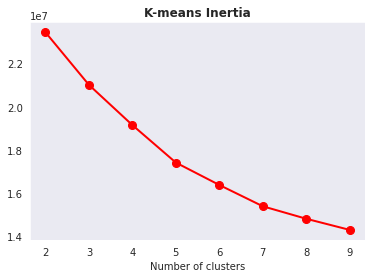

In [ ]:
plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid()

- Firstly, I applied the K-Means clustering with different number of clusters and using the elbow method, I have taken the number of cluster as 4.

In [ ]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=4,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

pd.Series(kmeans_labels).value_counts()

0    422460
2    198403
3    137040
1    129534
dtype: int64

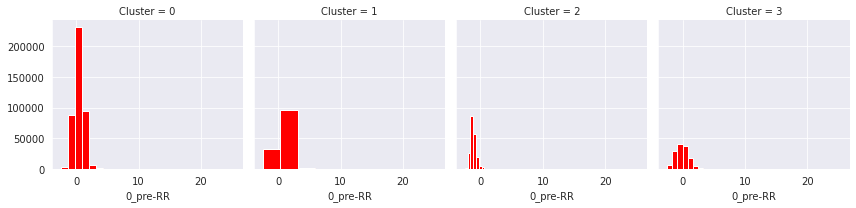

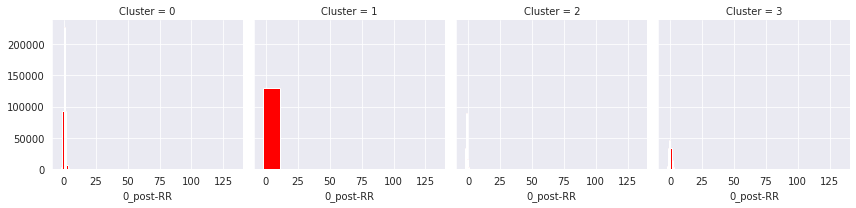

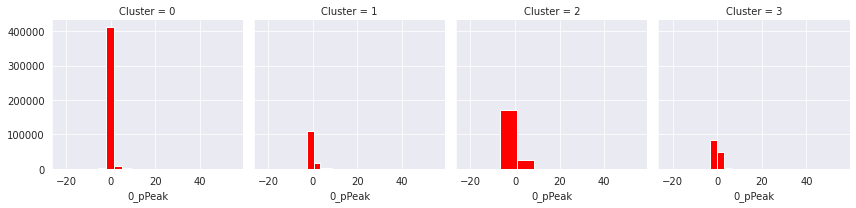

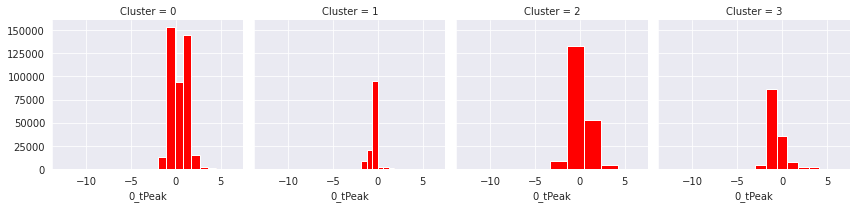

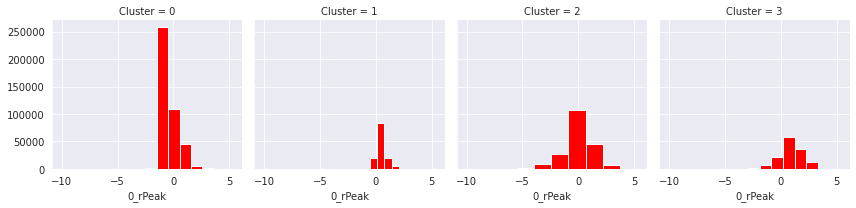

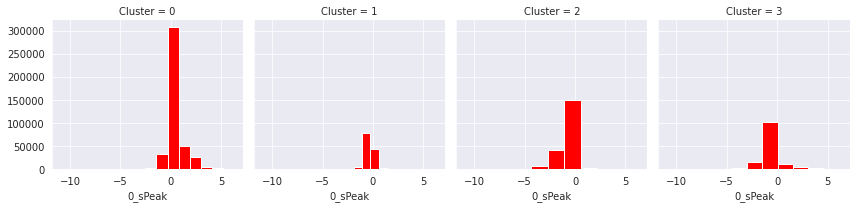

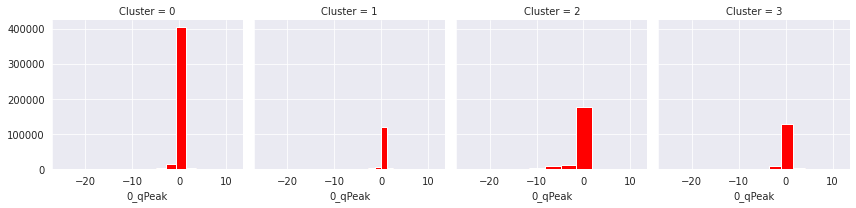

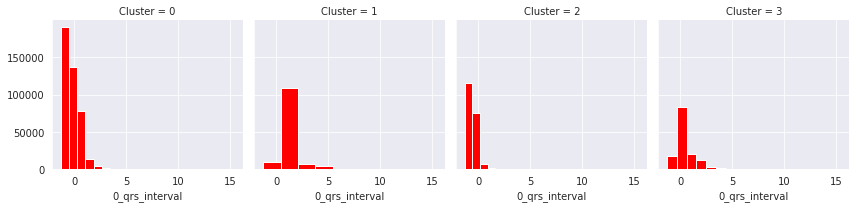

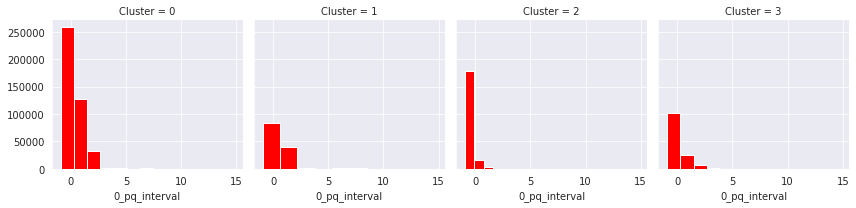

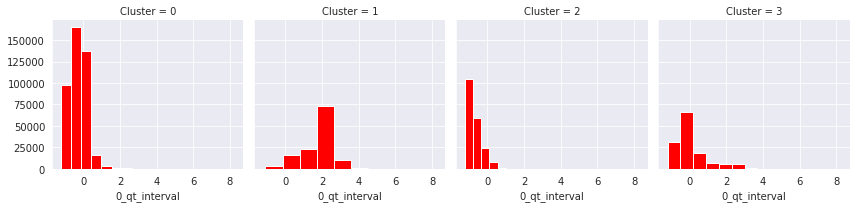

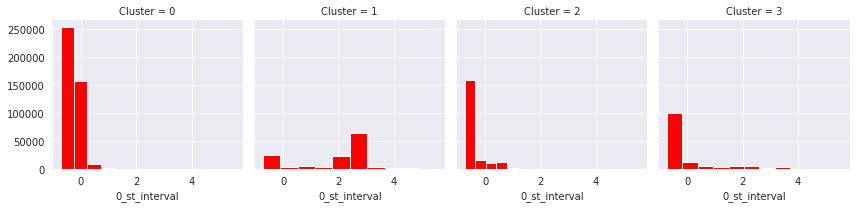

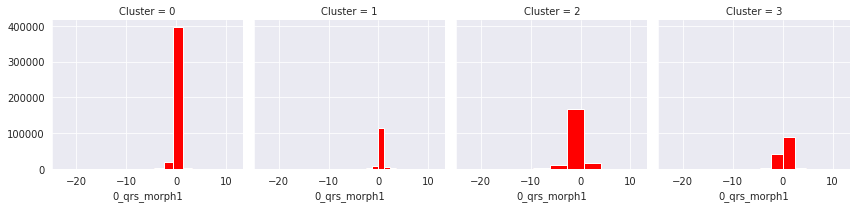

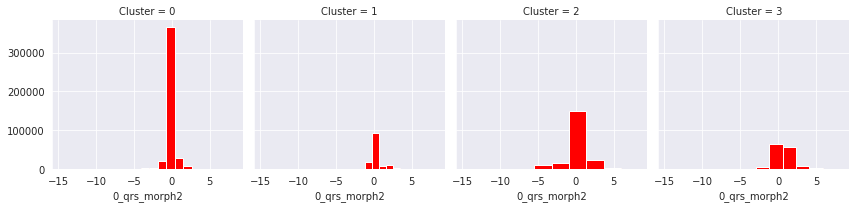

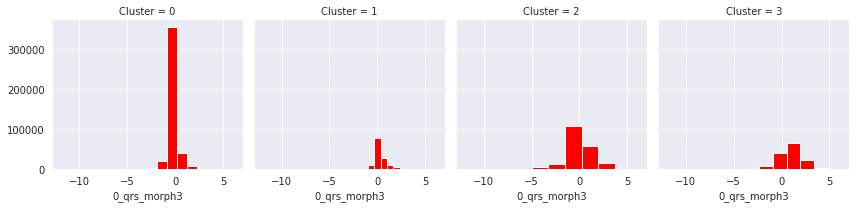

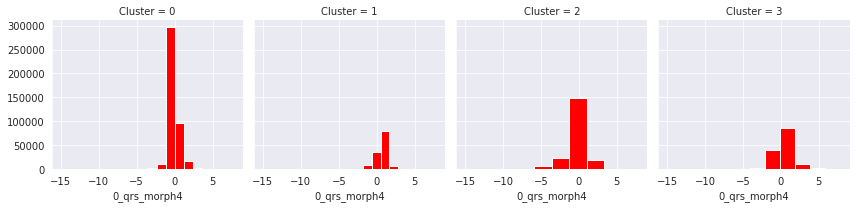

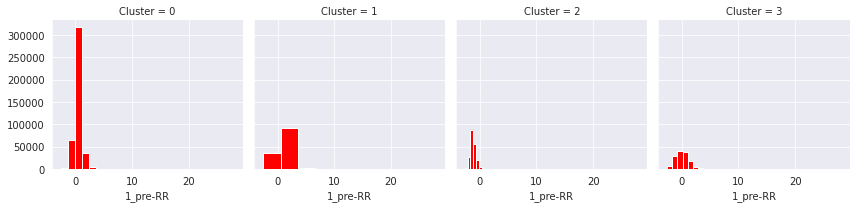

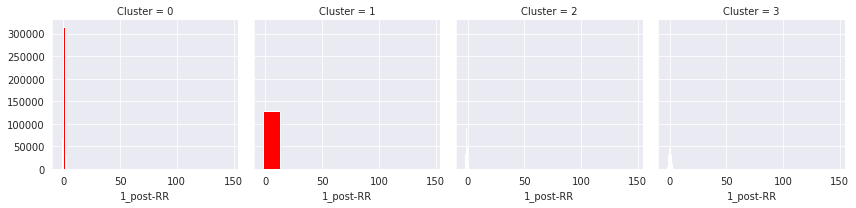

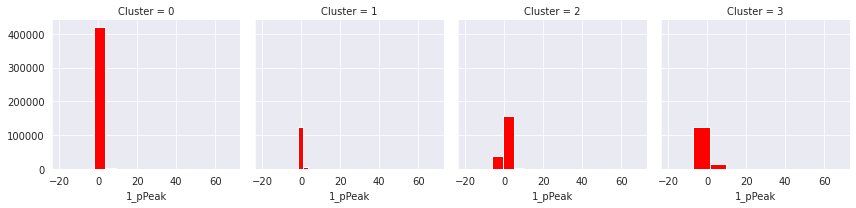

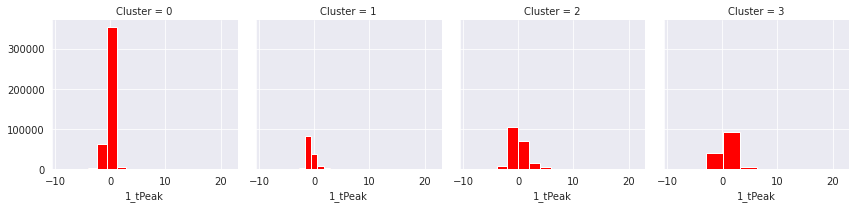

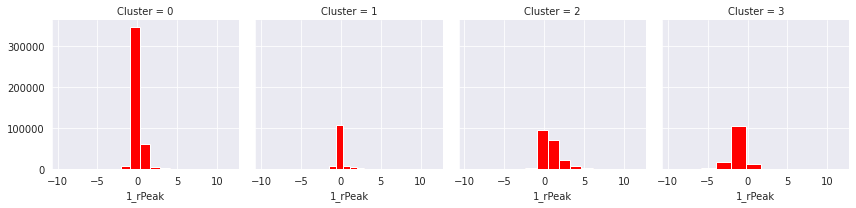

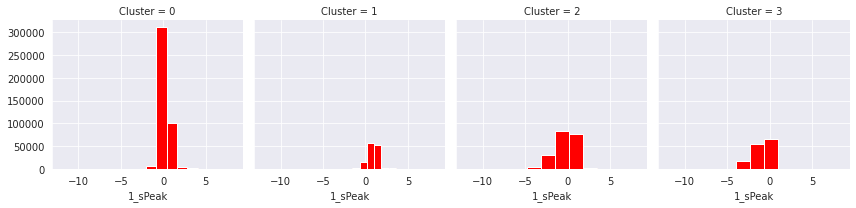

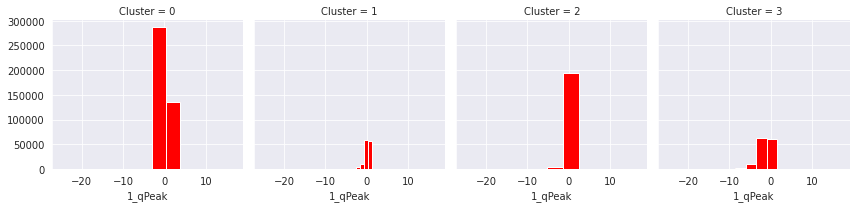

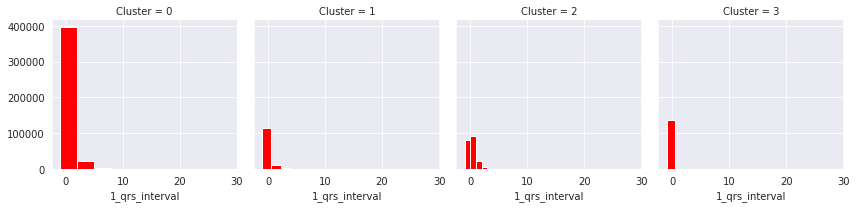

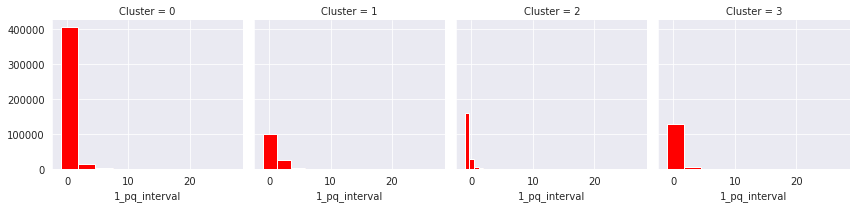

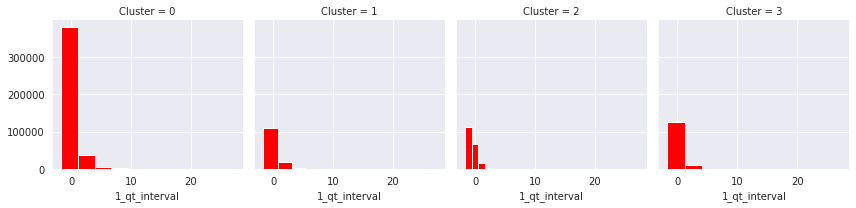

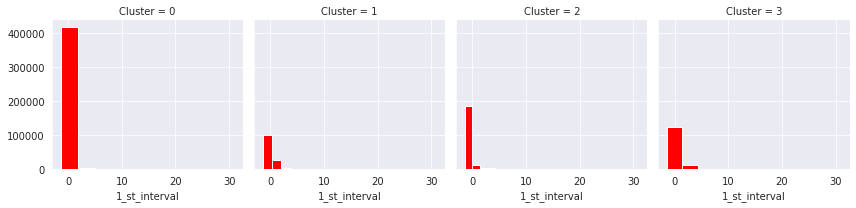

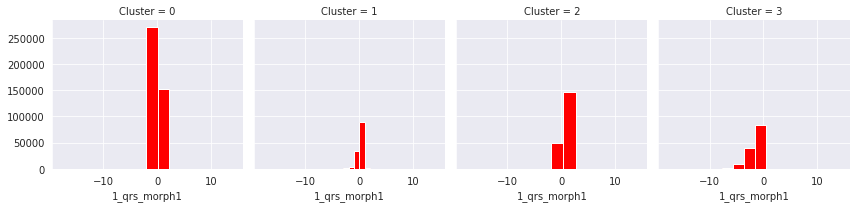

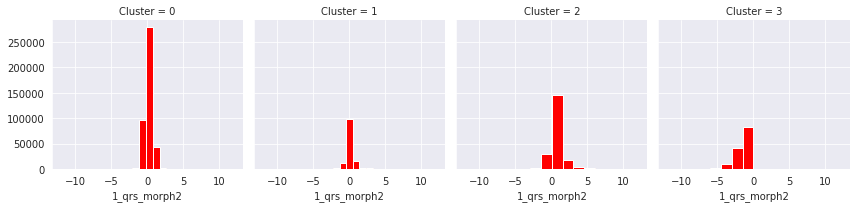

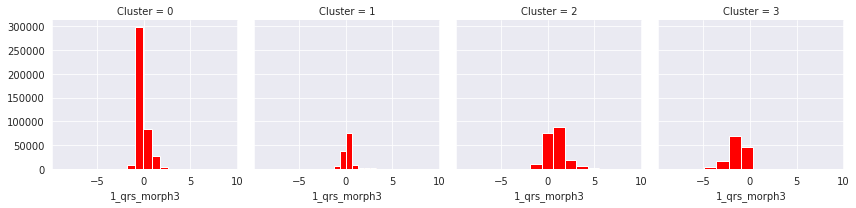

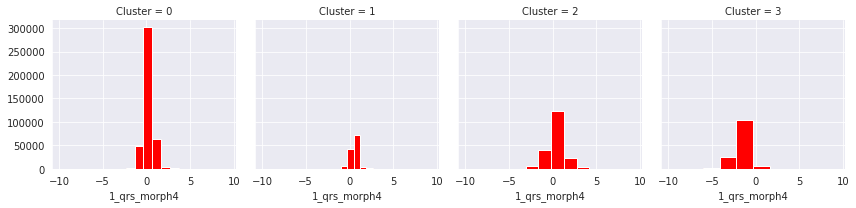

In [ ]:
data2= data_cluster.copy()
data2['Cluster']=kmeans_labels

aux=data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data2, col='Cluster')
    grid.map(plt.hist, cluster,color='red')

- Now, The plots above used to show distribution of each feature in each cluster.

In [ ]:
centroids_data=pd.DataFrame(data=std_scaler.inverse_transform(centroids), columns=X.columns)
centroids_data

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,229.298645,229.495765,0.055073,0.672816,0.254647,0.006253,-0.091191,14.499457,11.230240,35.552699,...,-0.466255,-0.150446,10.770075,8.997082,31.907280,12.140123,-0.163372,-0.177418,-0.196153,-0.296863
1,260.794359,258.704548,0.061612,0.107870,0.832975,-0.621221,-0.073021,37.155031,13.874420,108.606116,...,-0.165526,-0.154100,5.275320,10.138120,24.836862,9.423421,-0.148065,-0.133716,-0.120951,-0.139050
2,107.206460,106.594952,0.056626,0.453561,0.435590,-0.746224,-0.242249,8.953260,4.862816,21.818290,...,-0.704241,-0.075211,10.144906,3.940416,19.999942,5.914620,-0.040800,0.061064,0.123960,-0.159095
3,193.607785,195.566058,0.069332,0.002778,1.197455,-0.775600,-0.115105,23.013819,8.948231,48.138074,...,-1.015172,-0.555425,3.814834,8.123145,24.067491,12.129512,-0.601554,-0.738147,-0.857736,-0.963519


**Centroid Visualization on PCA DATA of Principal Component 1 and Principal component 2**

In [ ]:
pca = PCA(n_components = 5)
pca_data = pca.fit_transform(X)

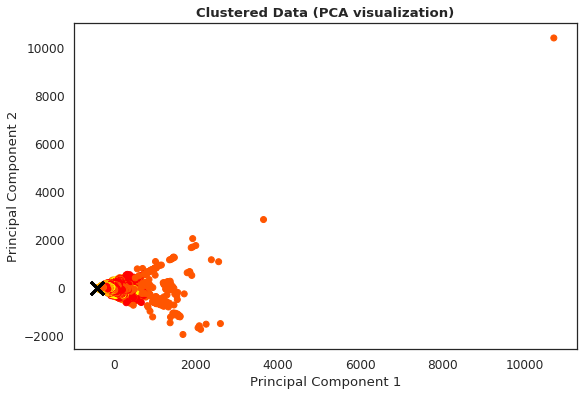

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=kmeans_labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

- Plotting the data points using two most principal components and show centroids on the data.